***Decisiontreeclassifier***

In [49]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
grid_tree=DecisionTreeClassifier()
grid_tree.fit(X_train,y_train)


DecisionTreeClassifier()

In [27]:
grid_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [28]:
param_grid={"criterion":["gini","entropy"],
            "max_depth":[3,4,5,6,7,8],
            "min_samples_split":[2,3,4],
            "min_samples_leaf":[1,2,3,4],
            "random_state":[0,42]
           }

In [29]:
grid_search=GridSearchCV(grid_tree,
                         param_grid,
                         scoring='accuracy',
                         cv=5,
                        verbose=True)

In [30]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [32]:
Dt_search=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [34]:
Dt_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 0}

In [35]:
Dt_search.best_score_

0.9592518888289261

In [33]:
dir(grid_search)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'feature_names_in_',
 'fit',
 'get_params',
 'inverse_transform',
 

In [36]:
grid_search.cv_results_

{'mean_fit_time': array([0.01314874, 0.01297684, 0.01348605, 0.01251082, 0.01563711,
        0.01259475, 0.0156249 , 0.00943651, 0.01562653, 0.00936131,
        0.01564054, 0.01228681, 0.01574368, 0.00938821, 0.01248293,
        0.01581607, 0.01248288, 0.01249876, 0.00942492, 0.01573591,
        0.01247602, 0.01463208, 0.01262326, 0.01581879, 0.01563721,
        0.01560836, 0.01457195, 0.01349611, 0.01560144, 0.01538992,
        0.01643562, 0.01469312, 0.0127995 , 0.01400132, 0.01624084,
        0.01255836, 0.01603732, 0.01552324, 0.01568518, 0.01648879,
        0.01603322, 0.01617441, 0.01731   , 0.01738706, 0.01574616,
        0.01250072, 0.01251612, 0.01249771, 0.01574244, 0.01882887,
        0.01885562, 0.01910419, 0.01576347, 0.01822982, 0.01740255,
        0.01562572, 0.01562543, 0.01579781, 0.01408739, 0.01563635,
        0.01574545, 0.01644101, 0.01581235, 0.01578088, 0.02038383,
        0.01893563, 0.01433988, 0.01773424, 0.01886778, 0.01990719,
        0.01642513, 0.01300516,

In [37]:
import pandas as pd
data=pd.read_csv('preprocessing_data.csv')
data

,Unnamed: 0,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,chrun
0,0,0,-0.264643,-0.946659,0,0,-1.508785,0.722258,16.810000,-0.944404,-1.403000,4.000000,-0.415473,0
1,1,0,0.029654,1.235009,0,0,0.304821,-0.901748,33.370000,-0.688523,-0.599124,3.000000,0.347522,0
2,2,0,2.580235,0.658246,0,0,-2.266627,0.613991,9.890000,-0.483818,-1.403000,4.000000,2.636507,1
3,3,0,-1.441834,0.783629,0,1,0.638123,-0.252146,36.410000,0.079121,-0.197185,3.000000,1.110517,0
4,4,0,0.127754,2.288228,0,0,-0.333851,0.253101,27.540000,-0.893228,1.008630,3.000000,-0.415473,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3401,3401,0,0.425571,-0.812865,0,0,0.135384,0.624801,31.826350,0.327498,-0.599124,3.296412,0.347522,1
3402,3402,0,0.012454,-0.963949,0,0,1.996968,-0.013465,48.823997,0.892847,-0.488635,3.362556,-0.415473,1
3403,3403,1,-0.662468,0.082870,0,0,1.863639,-0.597003,47.602196,0.775728,-0.442796,3.000000,-1.178468,1
3404,3404,0,-0.926917,-0.508744,1,0,-0.403901,1.453022,26.902268,0.024814,0.116989,4.000000,-1.178468,1


In [38]:
X=data.drop('chrun',axis=1)
y=data['chrun']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state =0)
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(2724, 13)
(682, 13)
(2724,)
(682,)


In [40]:
grid_search.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)>

***DecisionTreeClassifier***

accuracy 0.9164222873900293
precision 0.9315476190476191
recall 0.9020172910662824
f1score 0.9165446559297218
confusion_matrix [[312  23]
 [ 34 313]]


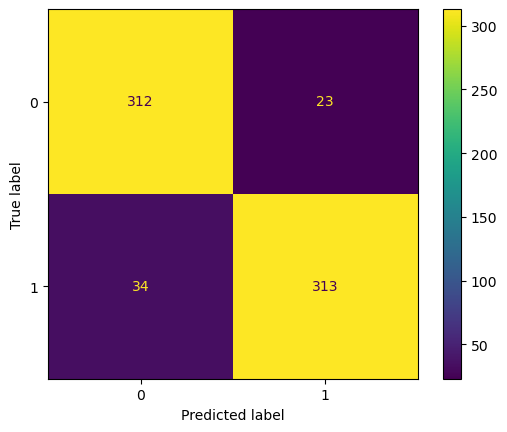

In [42]:
 from sklearn.tree import DecisionTreeClassifier
 DT=DecisionTreeClassifier()
 DT.fit(X_train,y_train)
 best_model_dt=grid_search.best_estimator_
 y_predictions_DT_best=DT.predict(X_test)
 from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,auc,roc_auc_score
 DT_accuracy_best=accuracy_score(y_test,y_predictions_DT_best)
 DT_precision_best=precision_score(y_test,y_predictions_DT_best)
 DT_recall_best=recall_score(y_test,y_predictions_DT_best)
 DT_f1score_best=f1_score(y_test,y_predictions_DT_best)
 DT_confusion_best=confusion_matrix(y_test,y_predictions_DT_best)
 print("accuracy",DT_accuracy_best)
 print("precision",DT_precision_best)
 print("recall",DT_recall_best)
 print("f1score",DT_f1score_best)
 print("confusion_matrix",DT_confusion_best)
 import matplotlib.pyplot as plt
 cmt_best=confusion_matrix(y_test,y_predictions_DT_best)
 ConfusionMatrixDisplay(cmt_best).plot()
 plt.grid(False)

***KNeighborsClassifier***

accuracy 0.8973607038123167
precision 0.9859649122807017
recall 0.8097982708933718
f1score 0.8892405063291139
confusion_matrix [[331   4]
 [ 66 281]]


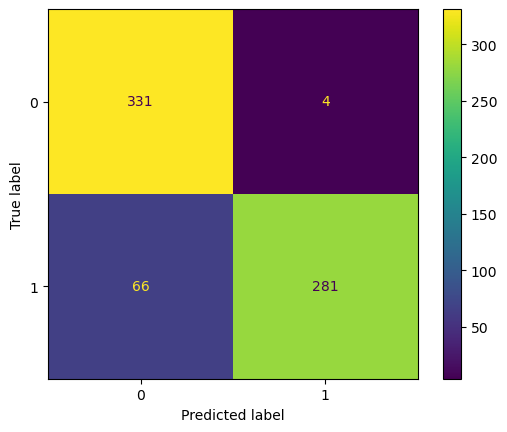

In [43]:
 from sklearn.neighbors import KNeighborsClassifier
 KN=KNeighborsClassifier()
 KN.fit(X_train,y_train)
 best_model_KN=grid_search.best_estimator_
 y_predictions_KN_best=KN.predict(X_test)
 from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,auc,roc_auc_score
 KN_accuracy_best=accuracy_score(y_test,y_predictions_KN_best)
 KN_precision_best=precision_score(y_test,y_predictions_KN_best)
 KN_recall_best=recall_score(y_test,y_predictions_KN_best)
 KN_f1score_best=f1_score(y_test,y_predictions_KN_best)
 KN_confusion_best=confusion_matrix(y_test,y_predictions_KN_best)
 print("accuracy",KN_accuracy_best)
 print("precision",KN_precision_best)
 print("recall",KN_recall_best)
 print("f1score",KN_f1score_best)
 print("confusion_matrix",KN_confusion_best)
 import matplotlib.pyplot as plt
 cmt_best=confusion_matrix(y_test,y_predictions_KN_best)
 ConfusionMatrixDisplay(cmt_best).plot()
 plt.grid(False)

***LR***

accuracy 0.9266862170087976
precision 0.9684542586750788
recall 0.8847262247838616
f1score 0.9246987951807228
confusion_matrix [[325  10]
 [ 40 307]]


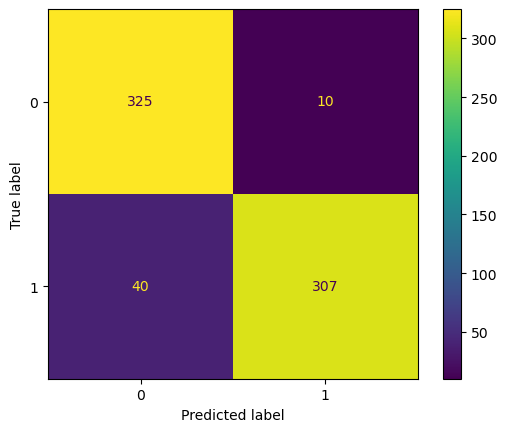

In [45]:
 from sklearn.linear_model import LinearRegression
 L=LinearRegression()
 L.fit(X_train,y_train)
 best_model_L=grid_search.best_estimator_
 y_predictions_L_best=best_model_L.predict(X_test)
 from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,auc,roc_auc_score
 L_accuracy_best=accuracy_score(y_test,y_predictions_L_best)
 L_precision_best=precision_score(y_test,y_predictions_L_best)
 L_recall_best=recall_score(y_test,y_predictions_L_best)
 L_f1score_best=f1_score(y_test,y_predictions_L_best)
 L_confusion_best=confusion_matrix(y_test,y_predictions_L_best)
 print("accuracy",L_accuracy_best)
 print("precision",L_precision_best)
 print("recall",L_recall_best)
 print("f1score",L_f1score_best)
 print("confusion_matrix",L_confusion_best)
 import matplotlib.pyplot as plt
 cmt_best=confusion_matrix(y_test,y_predictions_L_best)
 ConfusionMatrixDisplay(cmt_best).plot()
 plt.grid(False)

***NB***

accuracy 0.9266862170087976
precision 0.9684542586750788
recall 0.8847262247838616
f1score 0.9246987951807228
confusion_matrix [[325  10]
 [ 40 307]]


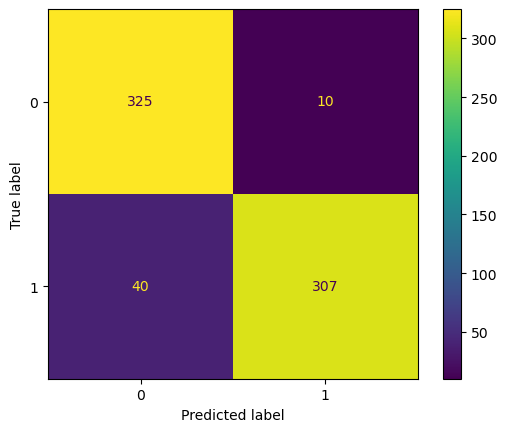

In [46]:
 from sklearn.naive_bayes import GaussianNB
 G=LinearRegression()
 G.fit(X_train,y_train)
 best_model_G=grid_search.best_estimator_
 y_predictions_G_best=best_model_G.predict(X_test)
 from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,auc,roc_auc_score
 G_accuracy_best=accuracy_score(y_test,y_predictions_G_best)
 G_precision_best=precision_score(y_test,y_predictions_G_best)
 G_recall_best=recall_score(y_test,y_predictions_G_best)
 G_f1score_best=f1_score(y_test,y_predictions_G_best)
 G_confusion_best=confusion_matrix(y_test,y_predictions_G_best)
 print("accuracy",G_accuracy_best)
 print("precision",G_precision_best)
 print("recall",G_recall_best)
 print("f1score",G_f1score_best)
 print("confusion_matrix",G_confusion_best)
 import matplotlib.pyplot as plt
 cmt_best=confusion_matrix(y_test,y_predictions_G_best)
 ConfusionMatrixDisplay(cmt_best).plot()
 plt.grid(False)